In [17]:
import os 
import matplotlib.pyplot as plt
import torch
import numpy as np

In [3]:
path = r'E:\Thesis\outputs\45452_20240606_dual\model_outputs'

In [14]:
fold_0 = os.path.join(path, 'fold_0_best_model_ssl.pth')
fold_1 = os.path.join(path, 'fold_1_best_model_ssl.pth')
fold_2 = os.path.join(path, 'fold_2_best_model_ssl.pth')

In [15]:
ckpt_0 = torch.load(fold_0, map_location='cpu')
ckpt_1 = torch.load(fold_1, map_location='cpu')
ckpt_2 = torch.load(fold_2, map_location='cpu')

In [12]:
ckpt_0.keys(), ckpt_1.keys()  

(dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'scheduler_state_dict', 'loss', 'train_loss_history', 'val_loss_history', 'train_acc_history', 'val_acc_history', 'train_loss_history_t1', 'val_loss_history_t1', 'train_acc_history_t1', 'val_acc_history_t1', 'train_loss_history_t2', 'val_loss_history_t2', 'train_acc_history_t2', 'val_acc_history_t2', 'log_var_seg_history', 'log_var_rec_history']),
 dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'scheduler_state_dict', 'loss', 'train_loss_history', 'val_loss_history', 'train_acc_history', 'val_acc_history', 'train_loss_history_t1', 'val_loss_history_t1', 'train_acc_history_t1', 'val_acc_history_t1', 'train_loss_history_t2', 'val_loss_history_t2', 'train_acc_history_t2', 'val_acc_history_t2', 'log_var_seg_history', 'log_var_rec_history']))

In [16]:
fold_histories = [ckpt_0, ckpt_1, ckpt_2]

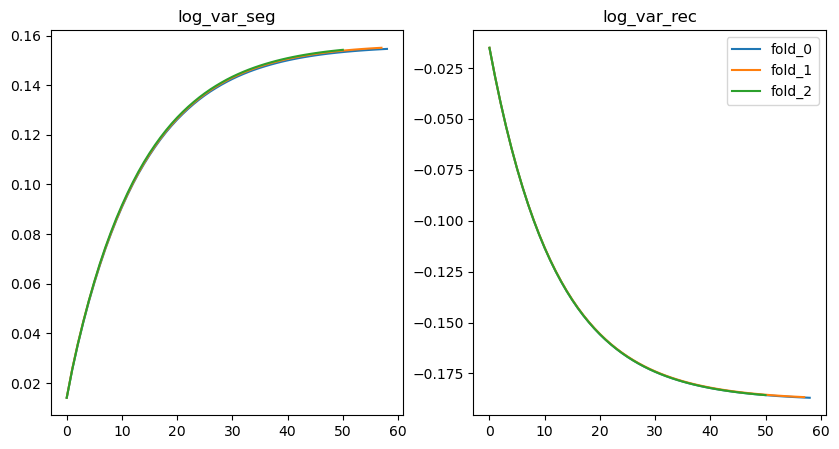

In [20]:
fig,axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(ckpt_0['log_var_seg_history'], label='fold_0')
axs[0].plot(ckpt_1['log_var_seg_history'], label='fold_1')
axs[0].plot(ckpt_2['log_var_seg_history'], label='fold_2')

axs[1].plot(ckpt_0['log_var_rec_history'], label='fold_0')
axs[1].plot(ckpt_1['log_var_rec_history'], label='fold_1')
axs[1].plot(ckpt_2['log_var_rec_history'], label='fold_2')

axs[0].set_title('log_var_seg')
axs[1].set_title('log_var_rec')
plt.legend()
plt.show()

In [22]:
def weight_history(log_var_seg_history, log_var_rec_history):
    weight_seg = [1/np.exp(log_var) for log_var in log_var_seg_history]
    weight_rec = [1/(2*np.exp(log_var)) for log_var in log_var_rec_history]
    return {'weight_seg': weight_seg, 'weight_rec': weight_rec} 


In [23]:
weights_0 = weight_history(ckpt_0['log_var_seg_history'], ckpt_0['log_var_rec_history'])
weights_1 = weight_history(ckpt_1['log_var_seg_history'], ckpt_1['log_var_rec_history'])
weights_2 = weight_history(ckpt_2['log_var_seg_history'], ckpt_2['log_var_rec_history'])


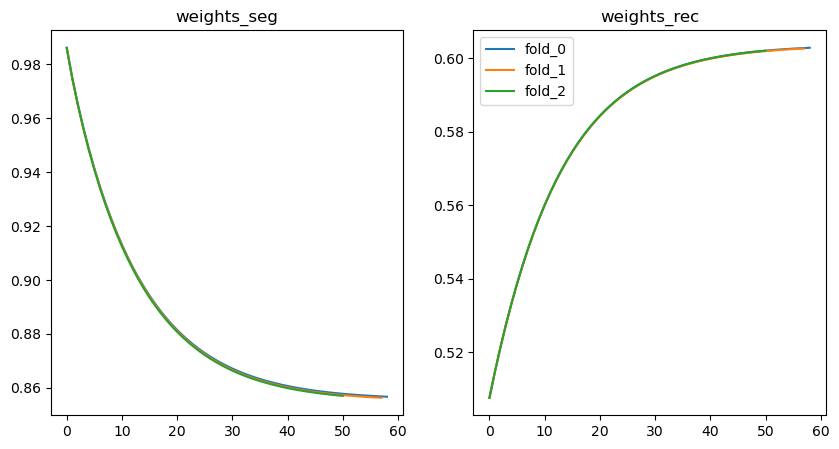

In [24]:
fig,axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(weights_0['weight_seg'], label='fold_0')
axs[0].plot(weights_1['weight_seg'], label='fold_1')
axs[0].plot(weights_2['weight_seg'], label='fold_2')

axs[1].plot(weights_0['weight_rec'], label='fold_0')
axs[1].plot(weights_1['weight_rec'], label='fold_1')
axs[1].plot(weights_2['weight_rec'], label='fold_2')

axs[0].set_title('weights_seg')
axs[1].set_title('weights_rec')
plt.legend()
plt.show()